In [ ]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats
from scipy.special import logit, expit

# SKLearn Modules
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, log_loss, confusion_matrix, RocCurveDisplay, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.preprocessing import StandardScaler

# imbalanced-learn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# XGBoost
from xgboost import XGBClassifier
import xgboost as xgb

# Dataset
from sklearn import datasets

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols



diabetes_binary_5050split_health_indicators_BRFSS2015.csv has already undersampled the majority class from the original dataset by the original source of the data and turned the multiclass target into a binary target 0 = nondiabetic and 1 = prediabetic or diabetic.

In [ ]:
# Load the dataset into a pandas DataFrame
df_large = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [ ]:
# change ordinal features to uint8 type

df_large = df_large.astype({'Diabetes_binary':'uint8',
     'HighBP':'uint8',
     'HighChol':'uint8',
     'CholCheck':'uint8',
     'Smoker':'uint8',
     'Stroke':'uint8',
     'HeartDiseaseorAttack':'uint8',
     'PhysActivity':'uint8',
     'Fruits':'uint8',
     'Veggies':'uint8',
     'HvyAlcoholConsump':'uint8',
     'AnyHealthcare':'uint8',
     'NoDocbcCost':'uint8',
     'GenHlth':'uint8',
     'MentHlth':'uint8',
     'PhysHlth':'uint8',
     'DiffWalk':'uint8',
     'Sex':'uint8',
     'Age':'uint8',
     'Education':'uint8',
     'Income':'uint8'})

In [ ]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  uint8  
 1   HighBP                70692 non-null  uint8  
 2   HighChol              70692 non-null  uint8  
 3   CholCheck             70692 non-null  uint8  
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  uint8  
 6   Stroke                70692 non-null  uint8  
 7   HeartDiseaseorAttack  70692 non-null  uint8  
 8   PhysActivity          70692 non-null  uint8  
 9   Fruits                70692 non-null  uint8  
 10  Veggies               70692 non-null  uint8  
 11  HvyAlcoholConsump     70692 non-null  uint8  
 12  AnyHealthcare         70692 non-null  uint8  
 13  NoDocbcCost           70692 non-null  uint8  
 14  GenHlth               70692 non-null  uint8  
 15  MentHlth           

In [ ]:
# most models wont run with my large data set of 250k rows so going to take a smaller set 5k and see how do

df = df_large.sample(n=30000, random_state=42)


Utilize logistic regression with standard scaler in pipeline and gridsearch.

In [ ]:
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Define the parameter grid
param_grid = {
    'clf__penalty': ['l1', 'l2', 'none'],
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__solver': ['saga'],
    'clf__max_iter': [100, 1000]
}


# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

Best hyperparameters: {'clf__C': 0.01, 'clf__max_iter': 100, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Best cross-validated recall score: 0.749
Test accuracy: 0.744
Test recall score: 0.744
Test AUC-ROC score: 0.826


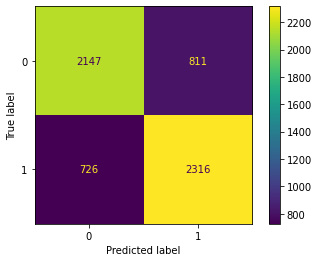

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2958
           1       0.74      0.76      0.75      3042

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')


In [ ]:
# Extract the logistic regression estimator from the pipeline
lr = pipeline.named_steps['clf']

# Get the feature names
feature_names = X_train.columns.tolist()

# Get the coefficients and sort them by absolute value
coef = lr.coef_[0]
coef_abs = np.abs(coef)
sorted_idx = coef_abs.argsort()[::-1]

# Print the feature importances
print("Feature importances:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {coef[i]:.4f}")

Feature importances:
GenHlth: 0.6470
BMI: 0.5615
Age: 0.4402
HighBP: 0.3551
HighChol: 0.2954
CholCheck: 0.2166
HvyAlcoholConsump: -0.1529
Sex: 0.1267
Income: -0.1209
PhysHlth: -0.0874
Education: -0.0781
HeartDiseaseorAttack: 0.0773
DiffWalk: 0.0617
MentHlth: -0.0386
PhysActivity: -0.0324
Stroke: 0.0299
Smoker: -0.0270
NoDocbcCost: -0.0192
Veggies: -0.0086
AnyHealthcare: 0.0073
Fruits: -0.0060


Utilize logistic regression with adding on from earlier model selecting KBest features.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and feature selection
pipeline_fs = Pipeline([
    #('smote', SMOTE(sampling_strategy='minority')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid_fs = {
    'select__k': [5, 10, 15, 20],
    'clf__penalty': ['l1', 'l2', 'none'],
    'clf__C': [ 0.1],
    'clf__solver': ['saga'],
    'clf__max_iter': [100, 1000]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search_fs = GridSearchCV(pipeline_fs, param_grid=param_grid_fs, cv=5, scoring=scorer)
grid_search_fs.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search_fs.best_params_}')
print(f'Best cross-validated recall score: {grid_search_fs.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline_fs.set_params(**grid_search_fs.best_params_)
pipeline_fs.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_fs = pipeline_fs.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy_fs = pipeline_fs.score(X_test, y_test)
print(f'Test accuracy with feature selection: {accuracy_fs:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred_fs, average = 'macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline_fs.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

Best hyperparameters: {'clf__C': 0.1, 'clf__max_iter': 100, 'clf__penalty': 'none', 'clf__solver': 'saga', 'select__k': 20}
Best cross-validated recall score: 0.749


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Test accuracy with feature selection: 0.743
Test recall score: 0.743
Test AUC-ROC score: 0.826


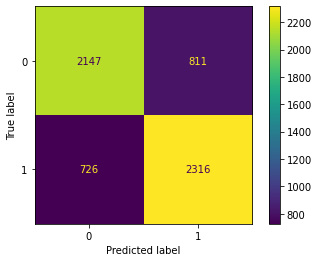

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2958
           1       0.74      0.76      0.75      3042

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred_fs)
print(f'Classification report:\n{report}')

Utilize random forest classifier with randomsearch.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the pipeline with SMOTE, Random Forest Classifier, and StandardScaler
pipeline = Pipeline([
   # ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])


# Define the parameter space to search
param_dist = {"clf__max_depth": [3, 5, 10, 20],
              "clf__max_features": [int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]/2)), 5, 3],
              "clf__n_estimators": [50, 100, 200, 500],
              "clf__criterion": ["gini", "entropy"]}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, 
                                   random_state=42, n_jobs=-1, scoring=scorer)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters: {}".format(random_search.best_params_))
print("Best cross-validated recall score: {:.3f}".format(random_search.best_score_))

# Fit the pipeline with the best hyperparameters on the training data
pipeline.set_params(**random_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

Best hyperparameters: {'clf__n_estimators': 500, 'clf__max_features': 5, 'clf__max_depth': 10, 'clf__criterion': 'gini'}
Best cross-validated recall score: 0.752
Test accuracy: 0.750
Test recall score: 0.749
Test AUC-ROC score: 0.829


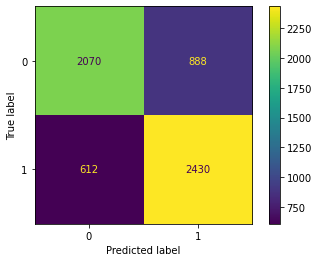

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      2958
           1       0.73      0.80      0.76      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
# Get the feature importances
rf_feature_importances = pd.DataFrame(zip(X_train.columns, pipeline.named_steps['clf'].feature_importances_))
rf_feature_importances = rf_feature_importances.sort_values(by=1, ascending=False)
rf_feature_importances.columns = ['feature', 'importance']

# Print the top 10 features by importance
print(rf_feature_importances.head(10))

                 feature  importance
13               GenHlth    0.226985
0                 HighBP    0.172887
3                    BMI    0.149568
18                   Age    0.104607
1               HighChol    0.081308
16              DiffWalk    0.046536
20                Income    0.038858
15              PhysHlth    0.034064
19             Education    0.022735
6   HeartDiseaseorAttack    0.022509


Utilize bagging classifier with DecisionTree as base estimator and gridsearch for optimal parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Define the bagging classifier
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.75, 1.0],
    'max_features': [0.5, 0.75, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Perform the grid search with F1-score as the scoring metric
grid_search = GridSearchCV(bagging_clf, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall-score: {grid_search.best_score_:.3f}')


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

Best hyperparameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.75, 'max_samples': 0.5, 'n_estimators': 100}
Best cross-validated recall-score: 0.750


In [ ]:
# Define the base estimator
base_estimator = DecisionTreeClassifier()

# Fit the base estimator with the training data
base_estimator.fit(X_train, y_train)

# Define the bagging classifier with the base estimator
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Fit the bagging classifier on the training data with the best hyperparameters
bagging_clf.set_params(**grid_search.best_params_)
bagging_clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = bagging_clf.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test accuracy: 0.746
Test recall score: 0.746


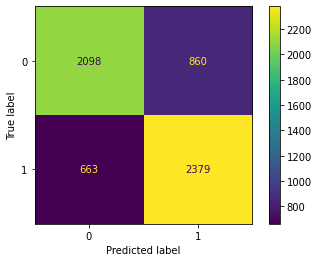

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2958
           1       0.73      0.78      0.76      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
import pandas as pd

# Get the feature importances from the base estimator
importances = bagging_clf.base_estimator_.feature_importances_

# Create a DataFrame with feature importances
df_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance value in descending order
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(df_importances)




                 Feature  Importance
13               GenHlth    0.173603
3                    BMI    0.139822
18                   Age    0.110699
20                Income    0.084256
0                 HighBP    0.076552
15              PhysHlth    0.067166
19             Education    0.057225
14              MentHlth    0.053071
8                 Fruits    0.032231
4                 Smoker    0.031506
17                   Sex    0.026895
7           PhysActivity    0.024418
9                Veggies    0.022815
1               HighChol    0.019521
6   HeartDiseaseorAttack    0.017871
16              DiffWalk    0.017407
12           NoDocbcCost    0.012801
5                 Stroke    0.011037
10     HvyAlcoholConsump    0.008989
11         AnyHealthcare    0.006987
2              CholCheck    0.005127


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


Utilize K Nearest Neighbors model and selecting for K Best features with grid search for optimal parameters.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE, StandardScaler, feature selection, and KNN
pipeline_knn = Pipeline([
  #  ('smote', SMOTE(sampling_strategy='minority')),
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', KNeighborsClassifier())
])

# Define the parameter grid for grid search
param_grid_knn = {
    'select__k': [5, 10, 15, 20],
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'clf__leaf_size': [10, 30, 50],
    'clf__p': [1, 2]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search_knn = GridSearchCV(pipeline_knn, param_grid=param_grid_knn, cv=5, scoring=scorer)
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search_knn.best_params_}')
print(f'Best cross-validated recall score: {grid_search_knn.best_score_:.3f}')

# Predict the target variable
pipeline_knn.set_params(**grid_search_knn.best_params_)
pipeline_knn.fit(X_train, y_train)

#Predict the target variable for the test data
y_pred_knn = pipeline_knn.predict(X_test)

#Evaluate the accuracy of the predictions
accuracy_knn = pipeline_knn.score(X_test, y_test)
print(f'Test accuracy with KNN: {accuracy_knn:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score with KNN: {recall:.3f}')


Best hyperparameters: {'clf__algorithm': 'kd_tree', 'clf__leaf_size': 30, 'clf__n_neighbors': 7, 'clf__p': 1, 'clf__weights': 'uniform', 'select__k': 15}
Best cross-validated recall score: 0.722
Test accuracy with KNN: 0.730
Test recall score with KNN: 0.746


In [ ]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline_knn.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

Test AUC-ROC score: 0.794


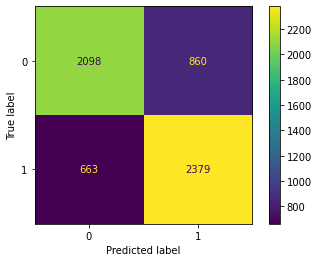

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      2958
           1       0.73      0.78      0.76      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

Utilize xgboost with grid search and standard scaler.

In [ ]:
# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler and XGBoost classifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', xgb.XGBClassifier(objective='binary:logistic'))
])


# Define the parameter grid for grid search
param_grid = {
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__n_estimators': [50, 100]
}


# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred,average='macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100}
Best cross-validated recall score: 0.752
Test accuracy: 0.750
Test recall score: 0.750
Test AUC-ROC score: 0.832


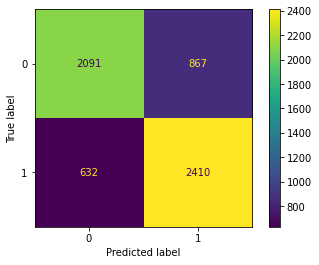

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2958
           1       0.74      0.79      0.76      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
importance = pipeline.named_steps['clf'].get_booster().get_score(importance_type='weight')
xgb_feature_importances = pd.DataFrame.from_dict(importance, orient='index', columns=['score'])
xgb_feature_importances = xgb_feature_importances.sort_values(by='score', ascending=False).reset_index()
xgb_feature_importances.columns = ['feature', 'score']
xgb_feature_importances.head(10)


,feature,score
0,f3,140.0
1,f18,101.0
2,f13,88.0
3,f20,56.0
4,f15,35.0
5,f2,30.0
6,f17,30.0
7,f1,29.0
8,f19,28.0
9,f14,26.0


Utilize AdaBoost classifier. Adaboost trains weak classifiers on the data, where each subsequent classifier is trained on the misclassified samples of the previous classifier. The final classifier is a weighted sum of the weak classifiers, with weights determined by their performance on the training data.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with StandardScaler, SMOTE, and AdaBoost classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', AdaBoostClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1]
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')


Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Best cross-validated recall score: 0.750
Test accuracy: 0.746
Test recall score: 0.746
Test AUC-ROC score: 0.828


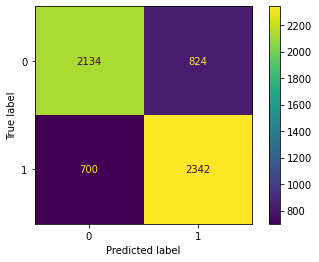

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      2958
           1       0.74      0.77      0.75      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

In [ ]:
# Get the decision tree estimators from the AdaBoostClassifier
tree_estimators = pipeline.named_steps['clf'].estimators_

# Calculate the feature importances for each tree estimator
tree_feature_importances = []
for tree in tree_estimators:
    feature_importances = tree.feature_importances_
    tree_feature_importances.append(feature_importances)

# Average the feature importances across all tree estimators
ada_feature_importances = pd.DataFrame(tree_feature_importances, columns=X_train.columns)
ada_feature_importances = ada_feature_importances.mean(axis=0).sort_values(ascending=False)
ada_feature_importances.head(10)


BMI                  0.215
Age                  0.170
GenHlth              0.130
Income               0.075
CholCheck            0.075
HighChol             0.065
Sex                  0.060
HvyAlcoholConsump    0.060
Education            0.040
HighBP               0.035
dtype: float64

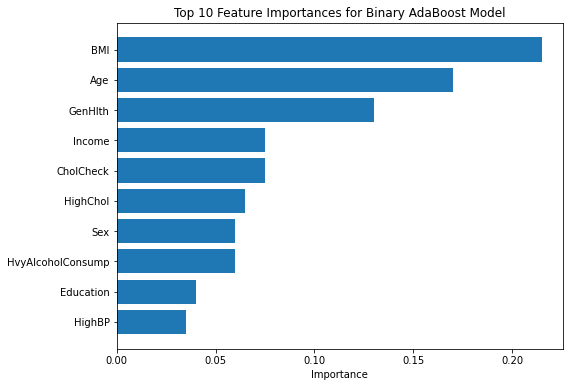

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 feature importances
n_features = 10
top_features = ada_feature_importances.head(n_features)

# Plot the feature importances
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features.index, top_features.values)
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Top {} Feature Importances for Binary AdaBoost Model'.format(n_features))
plt.show()



Utilize GradientBoost classifier with column transformer on standard scaler for numeric columns and gridsearch.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.compose import make_column_selector as selector

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline([
    ('preprocessing', ColumnTransformer([
        ('scaler', StandardScaler(), selector(dtype_include='number')),
        ('passthrough', 'passthrough', selector(dtype_exclude='number'))
    ])),
    ('clf', GradientBoostingClassifier(random_state=42))
])

# Define the parameter grid for grid search
param_grid = {
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [3, 5, 7],
    'clf__max_features': [None, 'sqrt']
}

# Define the scoring metric
scorer = make_scorer(recall_score, average='macro')

# Perform the grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best cross-validated recall score: {grid_search.best_score_:.3f}')

# Fit the pipeline on the training data
pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Calculate the F1 score for the test set
recall = recall_score(y_test, y_pred, average='macro')
print(f'Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')

Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200}
Best cross-validated recall score: 0.754
Test accuracy: 0.751
Test recall score: 0.751
Test AUC-ROC score: 0.833


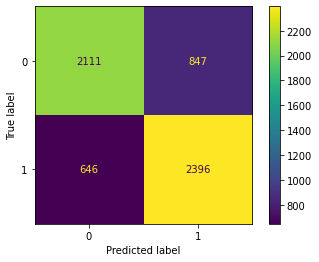

Classification report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2958
           1       0.74      0.79      0.76      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')


In [ ]:
# Get the feature names from the ColumnTransformer
feature_names = pipeline.named_steps['preprocessing'].transformers_[0][1].get_feature_names_out()

# Get the feature importances
gb_feature_importances = pd.DataFrame(zip(feature_names, pipeline.named_steps['clf'].feature_importances_), columns=['Feature', 'Importance'])
gb_feature_importances


,Feature,Importance
0,HighBP,0.220545
1,HighChol,0.073001
2,CholCheck,0.012480
3,BMI,0.187735
4,Smoker,0.001349
5,Stroke,0.003498
6,HeartDiseaseorAttack,0.040757
7,PhysActivity,0.014264
8,Fruits,0.001073
9,Veggies,0.000862


Stacking model using xgb, bagging, randomforest and adaboost pipelines. Utilize parameters that were optimized during earlier models.

In [ ]:

# Split the data into X (features) and y (target)
X = df.drop(['Diabetes_binary'], axis=1)
y = df['Diabetes_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import StackingClassifier
xgb_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('select', SelectKBest(k=20)),
    ('clf', XGBClassifier(learning_rate=1, max_depth=7, n_estimators=50))
])

bagging_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', BaggingClassifier(bootstrap=False, bootstrap_features=False, max_features=1.0, max_samples=1.0, n_estimators=10))
])
rf_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=200, max_features=3, max_depth=10, criterion='entropy', class_weight={0: 1, 1: 3}))
])

adaboost_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('clf', AdaBoostClassifier(learning_rate=1, n_estimators=100))
])
# Define the stacking model with a logistic regression meta-model
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_pipeline),
        ('bagging', bagging_pipeline),
        ('rf', rf_pipeline),
        ('adaboost', adaboost_pipeline)
    ],
    final_estimator=LogisticRegression()
)
# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate the accuracy of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Test accuracy: {accuracy:.3f}')

# Evaluate the F1 score of the stacking model
recall = recall_score(y_test, y_pred, average='macro')
print(f'Stacking Model Test recall score: {recall:.3f}')

# Calculate the AUC-ROC score for the test set
auc_roc = roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])
print(f'Test AUC-ROC score: {auc_roc:.3f}')


Stacking Model Test accuracy: 0.748
Stacking Model Test recall score: 0.747
Test AUC-ROC score: 0.827


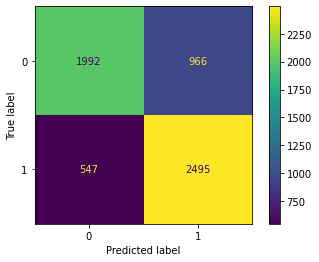

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      2958
           1       0.72      0.82      0.77      3042

    accuracy                           0.75      6000
   macro avg       0.75      0.75      0.75      6000
weighted avg       0.75      0.75      0.75      6000



In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calculate and print the classification report
report = classification_report(y_test, y_pred)
print(f'Classification report:\n{report}')

Conclusion and Recommendations:

I will select AdaBoost as our final model in proposal.

All of these models seem to have similar performance with an overall accuracy of around 75%. This is a strong improvement over the multiclass models from the first notebook. The precision and recall scores for the two classes (0 and 1) are also relatively similar across the models. However, there are slight variations in the macro and weighted F1 scores.

The logistic regression model with and without selectKBest feature selection has the lowest accuracy and F1 scores. This could indicate that the model is underfitting the data and may not be capturing the complexity of the relationships between the features and the target variable. The other models, including RandomForest, Bagging, KNN, XGBoost, AdaBoost, and Stacking models seem to be performing similarly well, with only slight variations in their precision, recall, and F1 scores.


Recommendations:
- Predicting diabetes with phone screening is not very reliable
- Binary model performs better than multi-class and still applies to our business case
- Model can still be useful for a generalization of risk
- Further improve model by tuning hyper-parameters, try more models, polynomial feature engineering etc.
- Look in the future to add additional biometric data to strengthen predictions
- Prioritize feedback on BMI, age and general health on future surveys as these have the strongest

